In [69]:
import pandas as pd
data = pd.read_csv("data_cleaned.csv")
data

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,0,United States,0.0,0.0,1.0,3,1,0.0,1.0,...,1,1.0,0,0,0,1,0,Maybe,1,0.0
1,44,1,United States,0.0,0.0,0.0,1,5,0.0,0.0,...,1,0.0,0,0,0,0,0,No,0,0.0
2,32,1,Canada,0.0,0.0,0.0,1,1,0.0,1.0,...,1,2.0,0,0,1,1,1,Yes,0,0.0
3,31,1,United Kingdom,0.0,1.0,1.0,3,2,0.0,1.0,...,0,2.0,1,1,0,0,0,Maybe,0,1.0
4,31,1,United States,0.0,0.0,0.0,0,3,1.0,1.0,...,1,0.0,0,0,0,1,1,Yes,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,26,1,United Kingdom,0.0,0.0,1.0,2,2,0.0,1.0,...,1,1.0,0,0,0,1,0,No,0,0.0
1247,32,1,United States,0.0,1.0,1.0,3,2,1.0,1.0,...,1,2.0,0,0,0,1,0,No,1,0.0
1248,34,1,United States,0.0,1.0,1.0,2,5,0.0,1.0,...,1,2.0,1,1,0,0,0,No,0,0.0
1249,46,0,United States,0.0,0.0,0.0,2,3,1.0,1.0,...,1,0.0,1,0,0,0,0,No,0,0.0


In [188]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [202]:
mean_treatment_seeking = np.mean(data[data['treatment'] == 1]['Age'])
mean_no_treatment_seeking = np.mean(data[data['treatment'] == 0]['Age'])
print(mean_treatment_seeking)
print(mean_no_treatment_seeking)
print(np.median(data[data['treatment'] == 1]['Age']))
print(np.median(data[data['treatment'] == 0]['Age']))
print(data[data['treatment'] == 1]['Age'].shape[0])
print(data[data['treatment'] == 0]['Age'].shape[0])


32.607594936708864
31.534733441033925
32.0
31.0
632
619


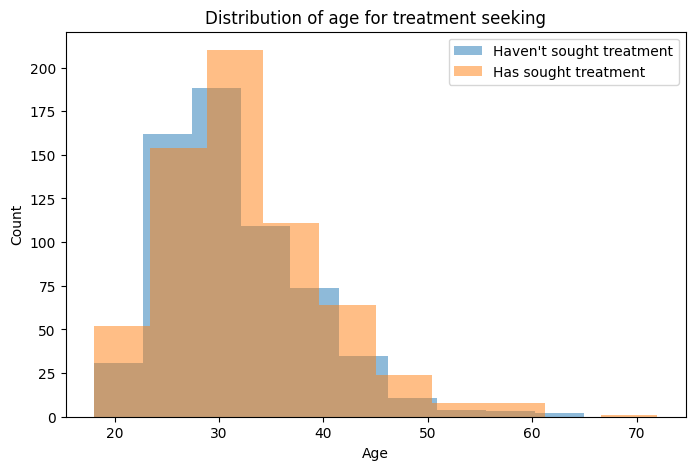

In [196]:
age_0 = data[data['treatment'] == 0]['Age']
age_1 = data[data['treatment'] == 1]['Age']

plt.figure(figsize=(8,5))

plt.hist(age_0, alpha=0.5, label="Haven't sought treatment")
plt.hist(age_1, alpha=0.5, label="Has sought treatment")

plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of age for treatment seeking")
plt.legend()

plt.savefig("minu_graafik1.png", dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipython-input-2710698403.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(country_stats['Country'], rotation=45, ha='right')


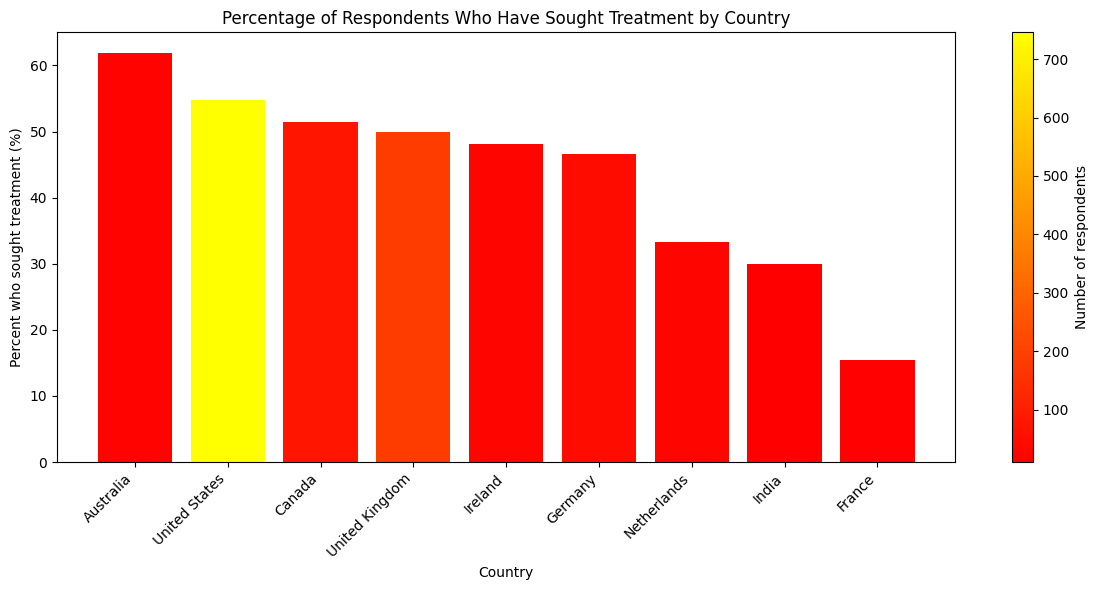

In [197]:
# Grouping by counties
country_stats = data.groupby('Country').agg(
    treatment_rate=('treatment', lambda x: x.mean() * 100),
    respondent_count=('treatment', 'count')
).reset_index()

# Removing countries with too small respondent count
country_stats = country_stats[country_stats['respondent_count'] >= 10]

# Sorting
country_stats = country_stats.sort_values('treatment_rate', ascending=False)

# Normalizing colors to respondent count
norm = plt.Normalize(
    country_stats['respondent_count'].min(),
    country_stats['respondent_count'].max()
)

# Colors
cmap = plt.cm.autumn
colors = cmap(norm(country_stats['respondent_count']))

# 5. Fig layout
fig, ax = plt.subplots(figsize=(12, 6))

# Barplot
ax.bar(
    country_stats['Country'],
    country_stats['treatment_rate'],
    color=colors
)

# Labels
ax.set_xticklabels(country_stats['Country'], rotation=45, ha='right')
ax.set_xlabel("Country")
ax.set_ylabel("Percent who sought treatment (%)")
ax.set_title("Percentage of Respondents Who Have Sought Treatment by Country")

# Colorstrip legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("Number of respondents")

plt.tight_layout()
plt.savefig("minu_graafik2.png", dpi=300, bbox_inches='tight')
plt.show()

In [195]:
data['Country'].value_counts()

,count
Country,
United States,746
United Kingdom,184
Canada,72
Germany,45
Netherlands,27
Ireland,27
Australia,21
France,13
India,10


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix


df = pd.read_csv('data_cleaned.csv', na_values=['NA'])
numeric_df = df.select_dtypes(include=['number'])
correlations = numeric_df.corr()['treatment'].sort_values(ascending=False)
print(correlations)

treatment                    1.000000
family_history               0.376674
work_interfere               0.301096
care_options                 0.272083
obs_consequence              0.152524
leave                        0.141701
mental_health_consequence    0.093062
seek_help                    0.085215
wellness_program             0.080151
Age                          0.073627
coworkers                    0.057944
benefits                     0.029501
phys_health_consequence      0.028123
remote_work                  0.026507
mental_health_interview      0.020537
self_employed                0.016442
no_employees                 0.013811
mental_vs_physical           0.006254
supervisor                  -0.024070
tech_company                -0.032521
anonymity                   -0.033870
Gender                      -0.186721
Name: treatment, dtype: float64


In [205]:
correlations2 = numeric_df[numeric_df['Gender'] == 1].corr()['treatment'].sort_values(ascending=False)
correlations3 = numeric_df[numeric_df['Gender'] == 0].corr()['treatment'].sort_values(ascending=False)
print(correlations2)
print(correlations3)

treatment                    1.000000
family_history               0.384302
work_interfere               0.308049
care_options                 0.261011
leave                        0.169487
obs_consequence              0.133163
Age                          0.110920
mental_health_consequence    0.102259
seek_help                    0.083687
wellness_program             0.080417
coworkers                    0.073315
mental_health_interview      0.042656
phys_health_consequence      0.037412
self_employed                0.030708
remote_work                  0.025828
no_employees                 0.008697
mental_vs_physical           0.002581
benefits                    -0.010085
tech_company                -0.015536
supervisor                  -0.035182
anonymity                   -0.037440
Gender                            NaN
Name: treatment, dtype: float64
treatment                    1.000000
family_history               0.259837
care_options                 0.252564
work_interfere    

In [204]:
print(data[data['Gender'] == 1].shape[0])
print(data[data['Gender'] == 0].shape[0])

1001
250


In [209]:
print(data[(data['Age'] > 50) & (data['treatment'] == 1)].shape[0])
print(data[(data['Age'] > 50) & (data['treatment'] == 0)].shape[0])

17
9


In [164]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

In [165]:
cols = [
    'Gender', 'self_employed', 'family_history', 'treatment',
    'remote_work', 'tech_company', 'benefits', 'care_options',
    'wellness_program', 'seek_help', 'anonymity',
    'mental_health_consequence', 'phys_health_consequence',
    'coworkers', 'supervisor', 'mental_health_interview', 'mental_vs_physical',
    'obs_consequence'
]
df_bin = df[cols].fillna(0).astype(int)

frequent_itemsets = apriori(df_bin, min_support=0.1, use_colnames=True)

rules = association_rules(
    frequent_itemsets,
    metric="confidence",
    min_threshold=0.6)

treatment_rules = rules[rules['consequents'].apply(lambda x: 'treatment' in x)]
treatment_rules = treatment_rules.sort_values(by='lift', ascending=False)
print("Top treatment rules:\n", treatment_rules[
    ['antecedents', 'consequents', 'support', 'confidence', 'lift']
    ].head())

for i, rule in enumerate(treatment_rules['antecedents'].head(5)):
    feature_name = f'rule_{i+1}'
    cols_in_rule = list(rule)  # convert frozenset to list
    df[feature_name] = df_bin[cols_in_rule].all(axis=1).astype(int)


rule_features = [f'rule_{i+1}' for i in range(5)]

Top treatment rules:
                                     antecedents  \
1298  (family_history, care_options, anonymity)   
727              (family_history, care_options)   
712              (family_history, care_options)   
1301             (family_history, care_options)   
1299   (family_history, benefits, care_options)   

                           consequents   support  confidence      lift  
1298             (benefits, treatment)  0.101519    0.658031  1.817212  
727            (supervisor, treatment)  0.102318    0.618357  1.807395  
712              (benefits, treatment)  0.106315    0.642512  1.774355  
1301  (treatment, benefits, anonymity)  0.101519    0.613527  1.748341  
1299            (treatment, anonymity)  0.101519    0.808917  1.700765  


In [167]:
top_features = ['family_history',
                'work_interfere',
                'care_options',
                'obs_consequence',
                'leave']

df['work_leave_interaction'] = df['work_interfere'] * df['leave']
top_features.append('work_leave_interaction')

X = df[['work_interfere', 'leave', 'no_employees'] + top_features + rule_features]
y = df['treatment']

In [176]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [177]:
rf = RandomForestClassifier(
    n_estimators=350,
    max_depth=5,
    random_state=42,
    class_weight='balanced'
)

# Fit the model
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Random Forest Accuracy: 0.7609561752988048
ROC-AUC: 0.7871296652558676
Confusion Matrix:
 [[ 82  31]
 [ 29 109]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.73      0.73       113
         1.0       0.78      0.79      0.78       138

    accuracy                           0.76       251
   macro avg       0.76      0.76      0.76       251
weighted avg       0.76      0.76      0.76       251



In [161]:
# Keep top correlated features
X = df[['family_history', 'work_interfere', 'care_options', 'obs_consequence', 'leave', 'mental_health_consequence', 'seek_help']]
y = df['treatment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [144]:
model_log = LogisticRegression().fit(X_train, y_train)

y_pred1 = model_log.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("ROC-AUC:", roc_auc_score(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1, labels=[1,0])) #with labels = [1,0]: 1st row: tp, fn, 2nd row: fp, tn;

Accuracy: 0.7101063829787234
ROC-AUC: 0.7097727272727272
Confusion Matrix:
 [[143  57]
 [ 52 124]]


In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [162]:
model_rf = RandomForestClassifier(n_estimators=300, max_depth=5, random_state=42, class_weight='balanced').fit(X_train, y_train)


y_pred2 = model_rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("ROC-AUC:", roc_auc_score(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2, labels=[1,0])) #with labels = [1,0]: 1st row: tp, fn, 2nd row: fp, tn;

Accuracy: 0.7446808510638298
ROC-AUC: 0.7402272727272727
Confusion Matrix:
 [[162  38]
 [ 58 118]]


In [146]:
model_rf2 = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=0).fit(X_train, y_train)


y_pred3 = model_rf2.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred3))
print("ROC-AUC:", roc_auc_score(y_test, y_pred3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred3, labels=[1,0])) #with labels = [1,0]: 1st row: tp, fn, 2nd row: fp, tn;

Accuracy: 0.7101063829787234
ROC-AUC: 0.7094318181818181
Confusion Matrix:
 [[144  56]
 [ 53 123]]


In [163]:
model_knn = KNeighborsClassifier(n_neighbors=25).fit(X_train, y_train)


y_pred4 = model_knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred4))
print("ROC-AUC:", roc_auc_score(y_test, y_pred4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred4, labels=[1,0])) #with labels = [1,0]: 1st row: tp, fn, 2nd row: fp, tn;

Accuracy: 0.75
ROC-AUC: 0.7506818181818181
Confusion Matrix:
 [[148  52]
 [ 42 134]]


In [113]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [148]:
model_svc_r = SVC(kernel='rbf').fit(X_train, y_train)


y_pred5 = model_svc_r.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred5))
print("ROC-AUC:", roc_auc_score(y_test, y_pred5))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred5, labels=[1,0])) #with labels = [1,0]: 1st row: tp, fn, 2nd row: fp, tn;

Accuracy: 0.75
ROC-AUC: 0.7465909090909091
Confusion Matrix:
 [[160  40]
 [ 54 122]]


In [149]:
model_dt1 = DecisionTreeClassifier(criterion='entropy', random_state=0).fit(X_train, y_train)


y_pred6 = model_dt1.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred6))
print("ROC-AUC:", roc_auc_score(y_test, y_pred6))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred6, labels=[1,0])) #with labels = [1,0]: 1st row: tp, fn, 2nd row: fp, tn;

Accuracy: 0.6968085106382979
ROC-AUC: 0.6982954545454546
Confusion Matrix:
 [[135  65]
 [ 49 127]]


In [150]:
model_dt2 = DecisionTreeClassifier(criterion='gini', random_state=0).fit(X_train, y_train)


y_pred7 = model_dt2.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred7))
print("ROC-AUC:", roc_auc_score(y_test, y_pred7))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred7, labels=[1,0])) #with labels = [1,0]: 1st row: tp, fn, 2nd row: fp, tn;

Accuracy: 0.6941489361702128
ROC-AUC: 0.6954545454545454
Confusion Matrix:
 [[135  65]
 [ 50 126]]


In [151]:
X1 = df[['family_history', 'work_interfere', 'care_options', 'obs_consequence', 'leave']]
y1 = df['treatment']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [154]:
model_rf_new = RandomForestClassifier(n_estimators=300, max_depth=5, random_state=42, class_weight='balanced').fit(X_train1, y_train1)


y_pred8 = model_rf_new.predict(X_test1)
print("Accuracy:", accuracy_score(y_test1, y_pred8))
print("ROC-AUC:", roc_auc_score(y_test1, y_pred8))
print("Confusion Matrix:\n", confusion_matrix(y_test1, y_pred8, labels=[1,0])) #with labels = [1,0]: 1st row: tp, fn, 2nd row: fp, tn;

Accuracy: 0.7290836653386454
ROC-AUC: 0.7239643452609977
Confusion Matrix:
 [[107  31]
 [ 37  76]]
